## 데이터 이해하기
지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

Feature Data 지정하기<br>
Label Data 지정하기<br>
Target Names 출력해 보기<br>
데이터 Describe 해 보기<br>

## 다양한 모델로 학습시켜보기
학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

Decision Tree 사용해 보기<br>
Random Forest 사용해 보기<br>
SVM 사용해 보기<br>
SGD Classifier 사용해 보기<br>
Logistic Regression 사용해 보기<br>


## 모델을 평가해 보기
학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### Feature Data 지정

In [3]:
# breast_df = 
breast_df = pd.DataFrame(data=data.data, columns=data.feature_names)
breast_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

### Label Data 지정

In [5]:
breast_target = pd.DataFrame(data=data.target, columns=['label'])
breast_target

,label
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


### Target Name

In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

### Describe

In [7]:
breast_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
breast_target.describe()

,label
count,569.000000
mean,0.627417
std,0.483918
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
len(breast_df.columns)

30

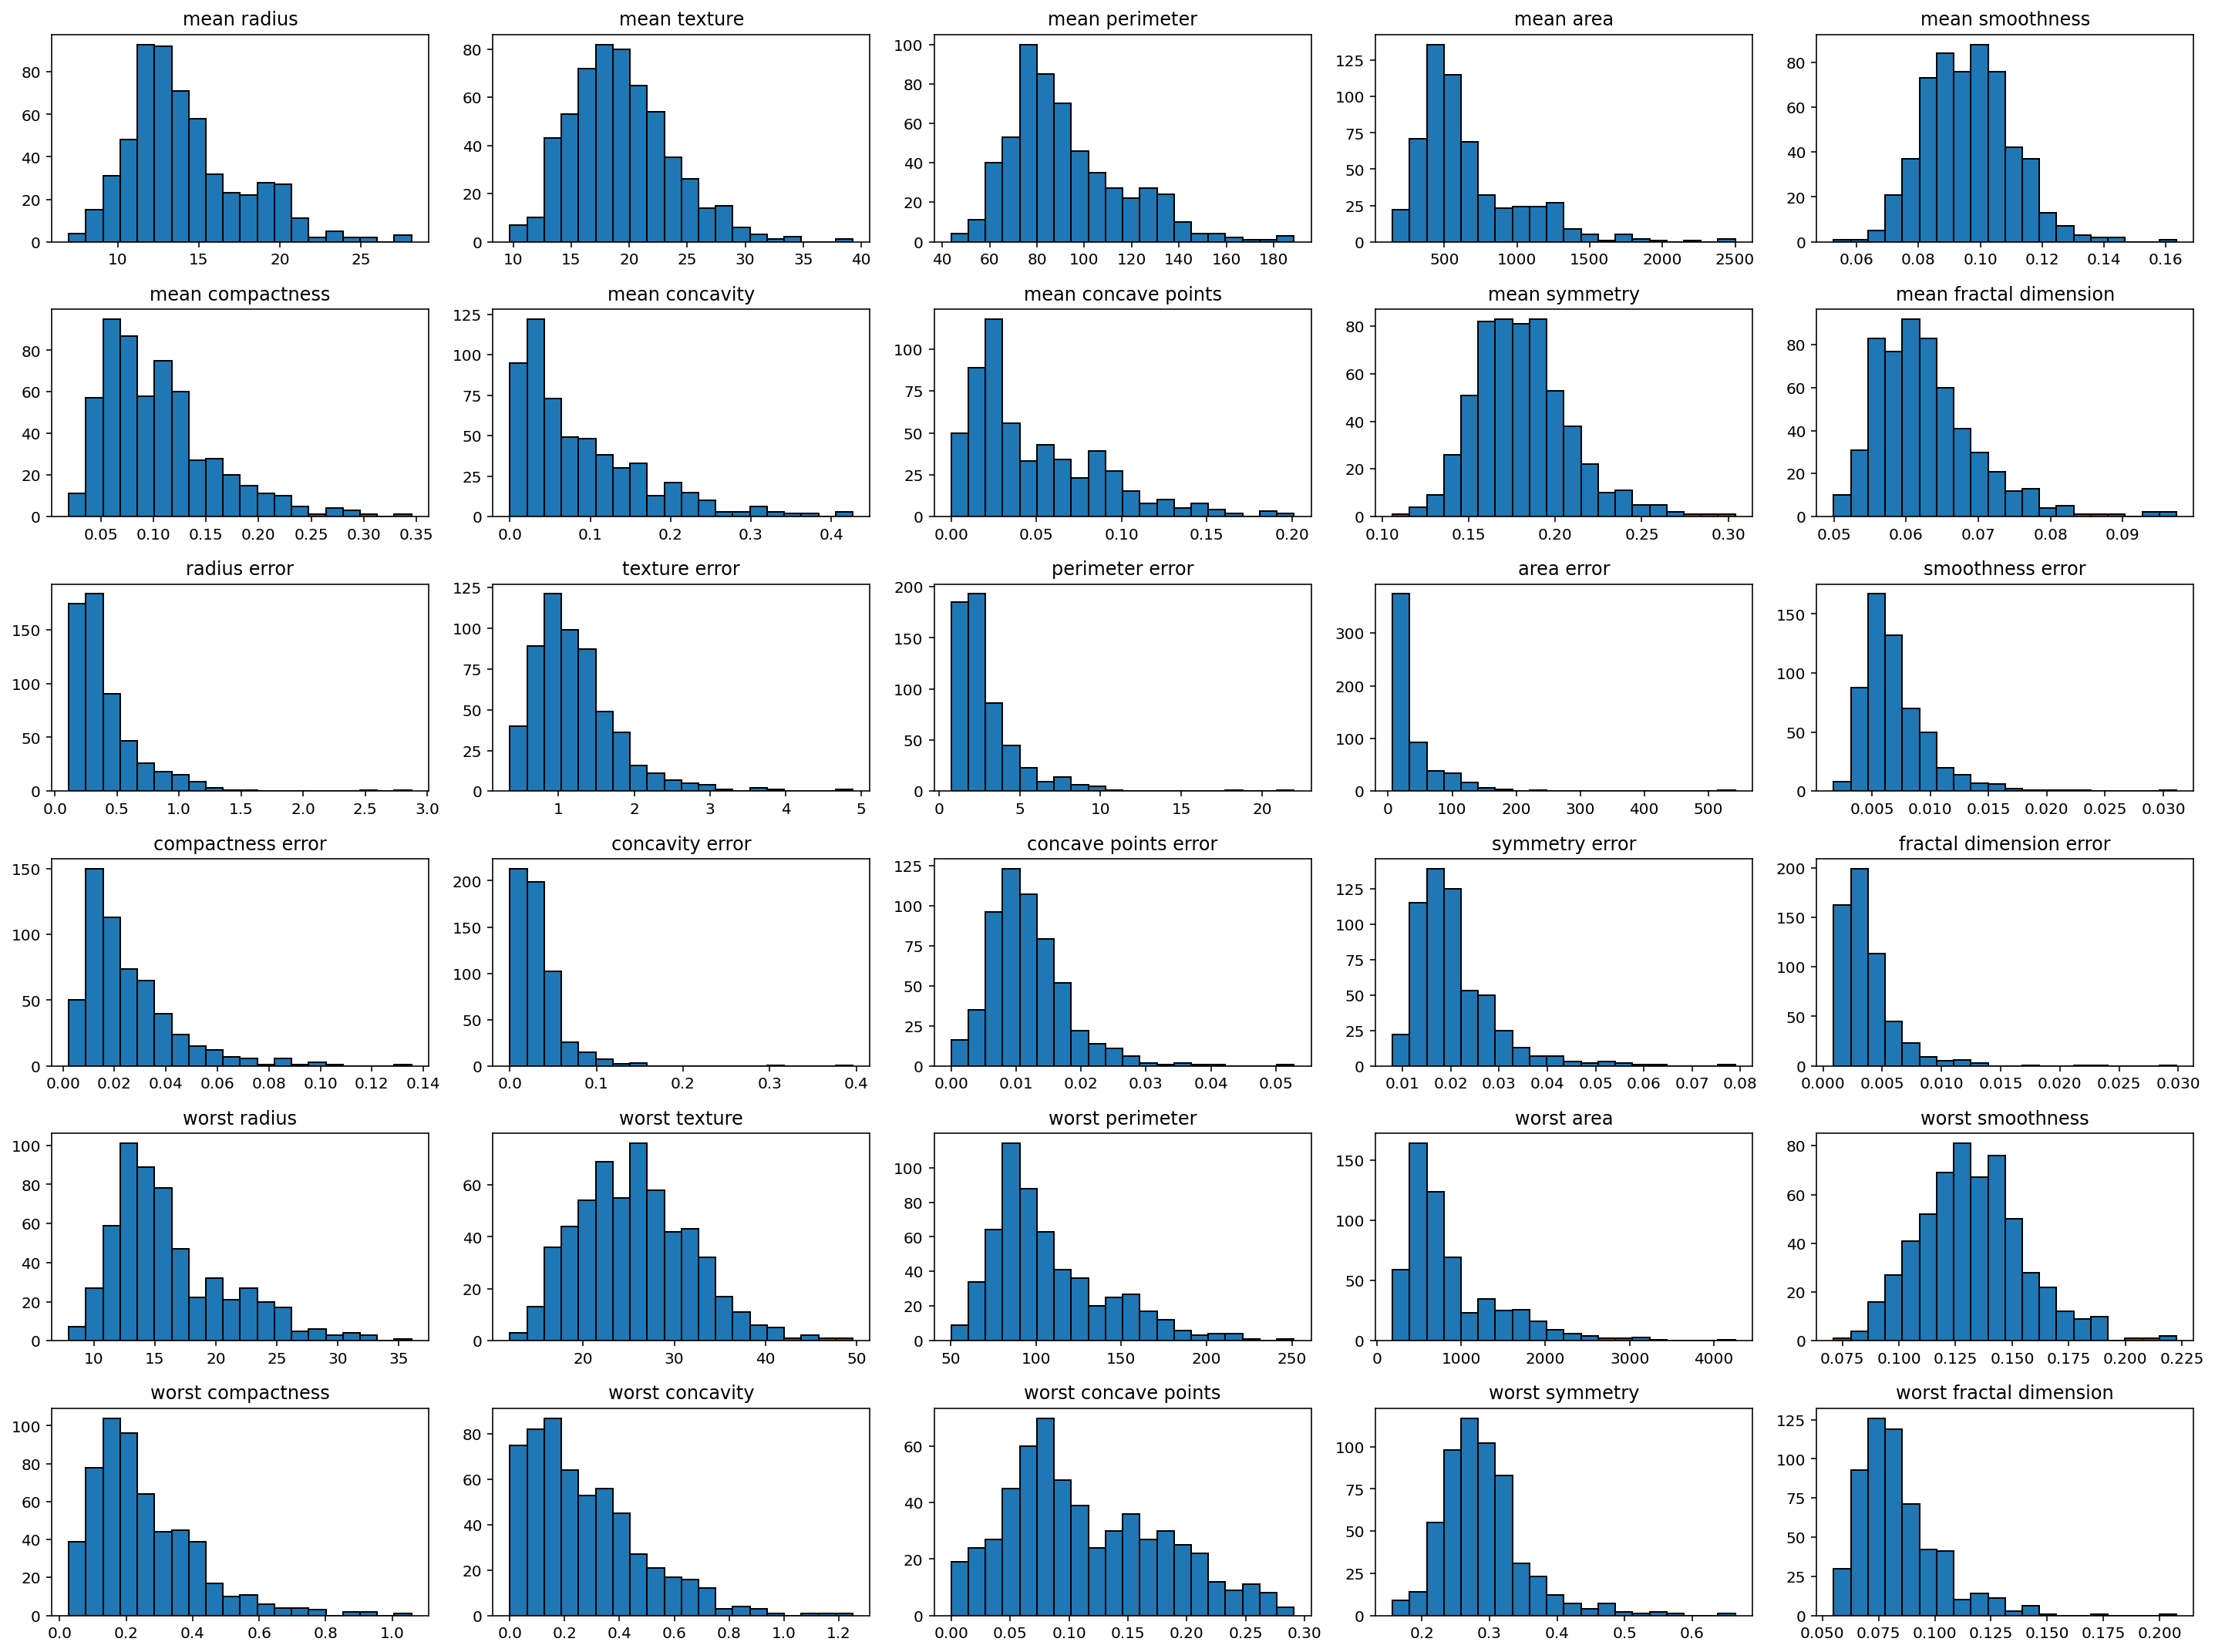

In [10]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 15))
for i, column in enumerate(breast_df.columns):
    ax = axes.flatten()[i]
    ax.hist(breast_df[column], bins=20, edgecolor='black')
    ax.set_title(column)

plt.tight_layout()
plt.show()

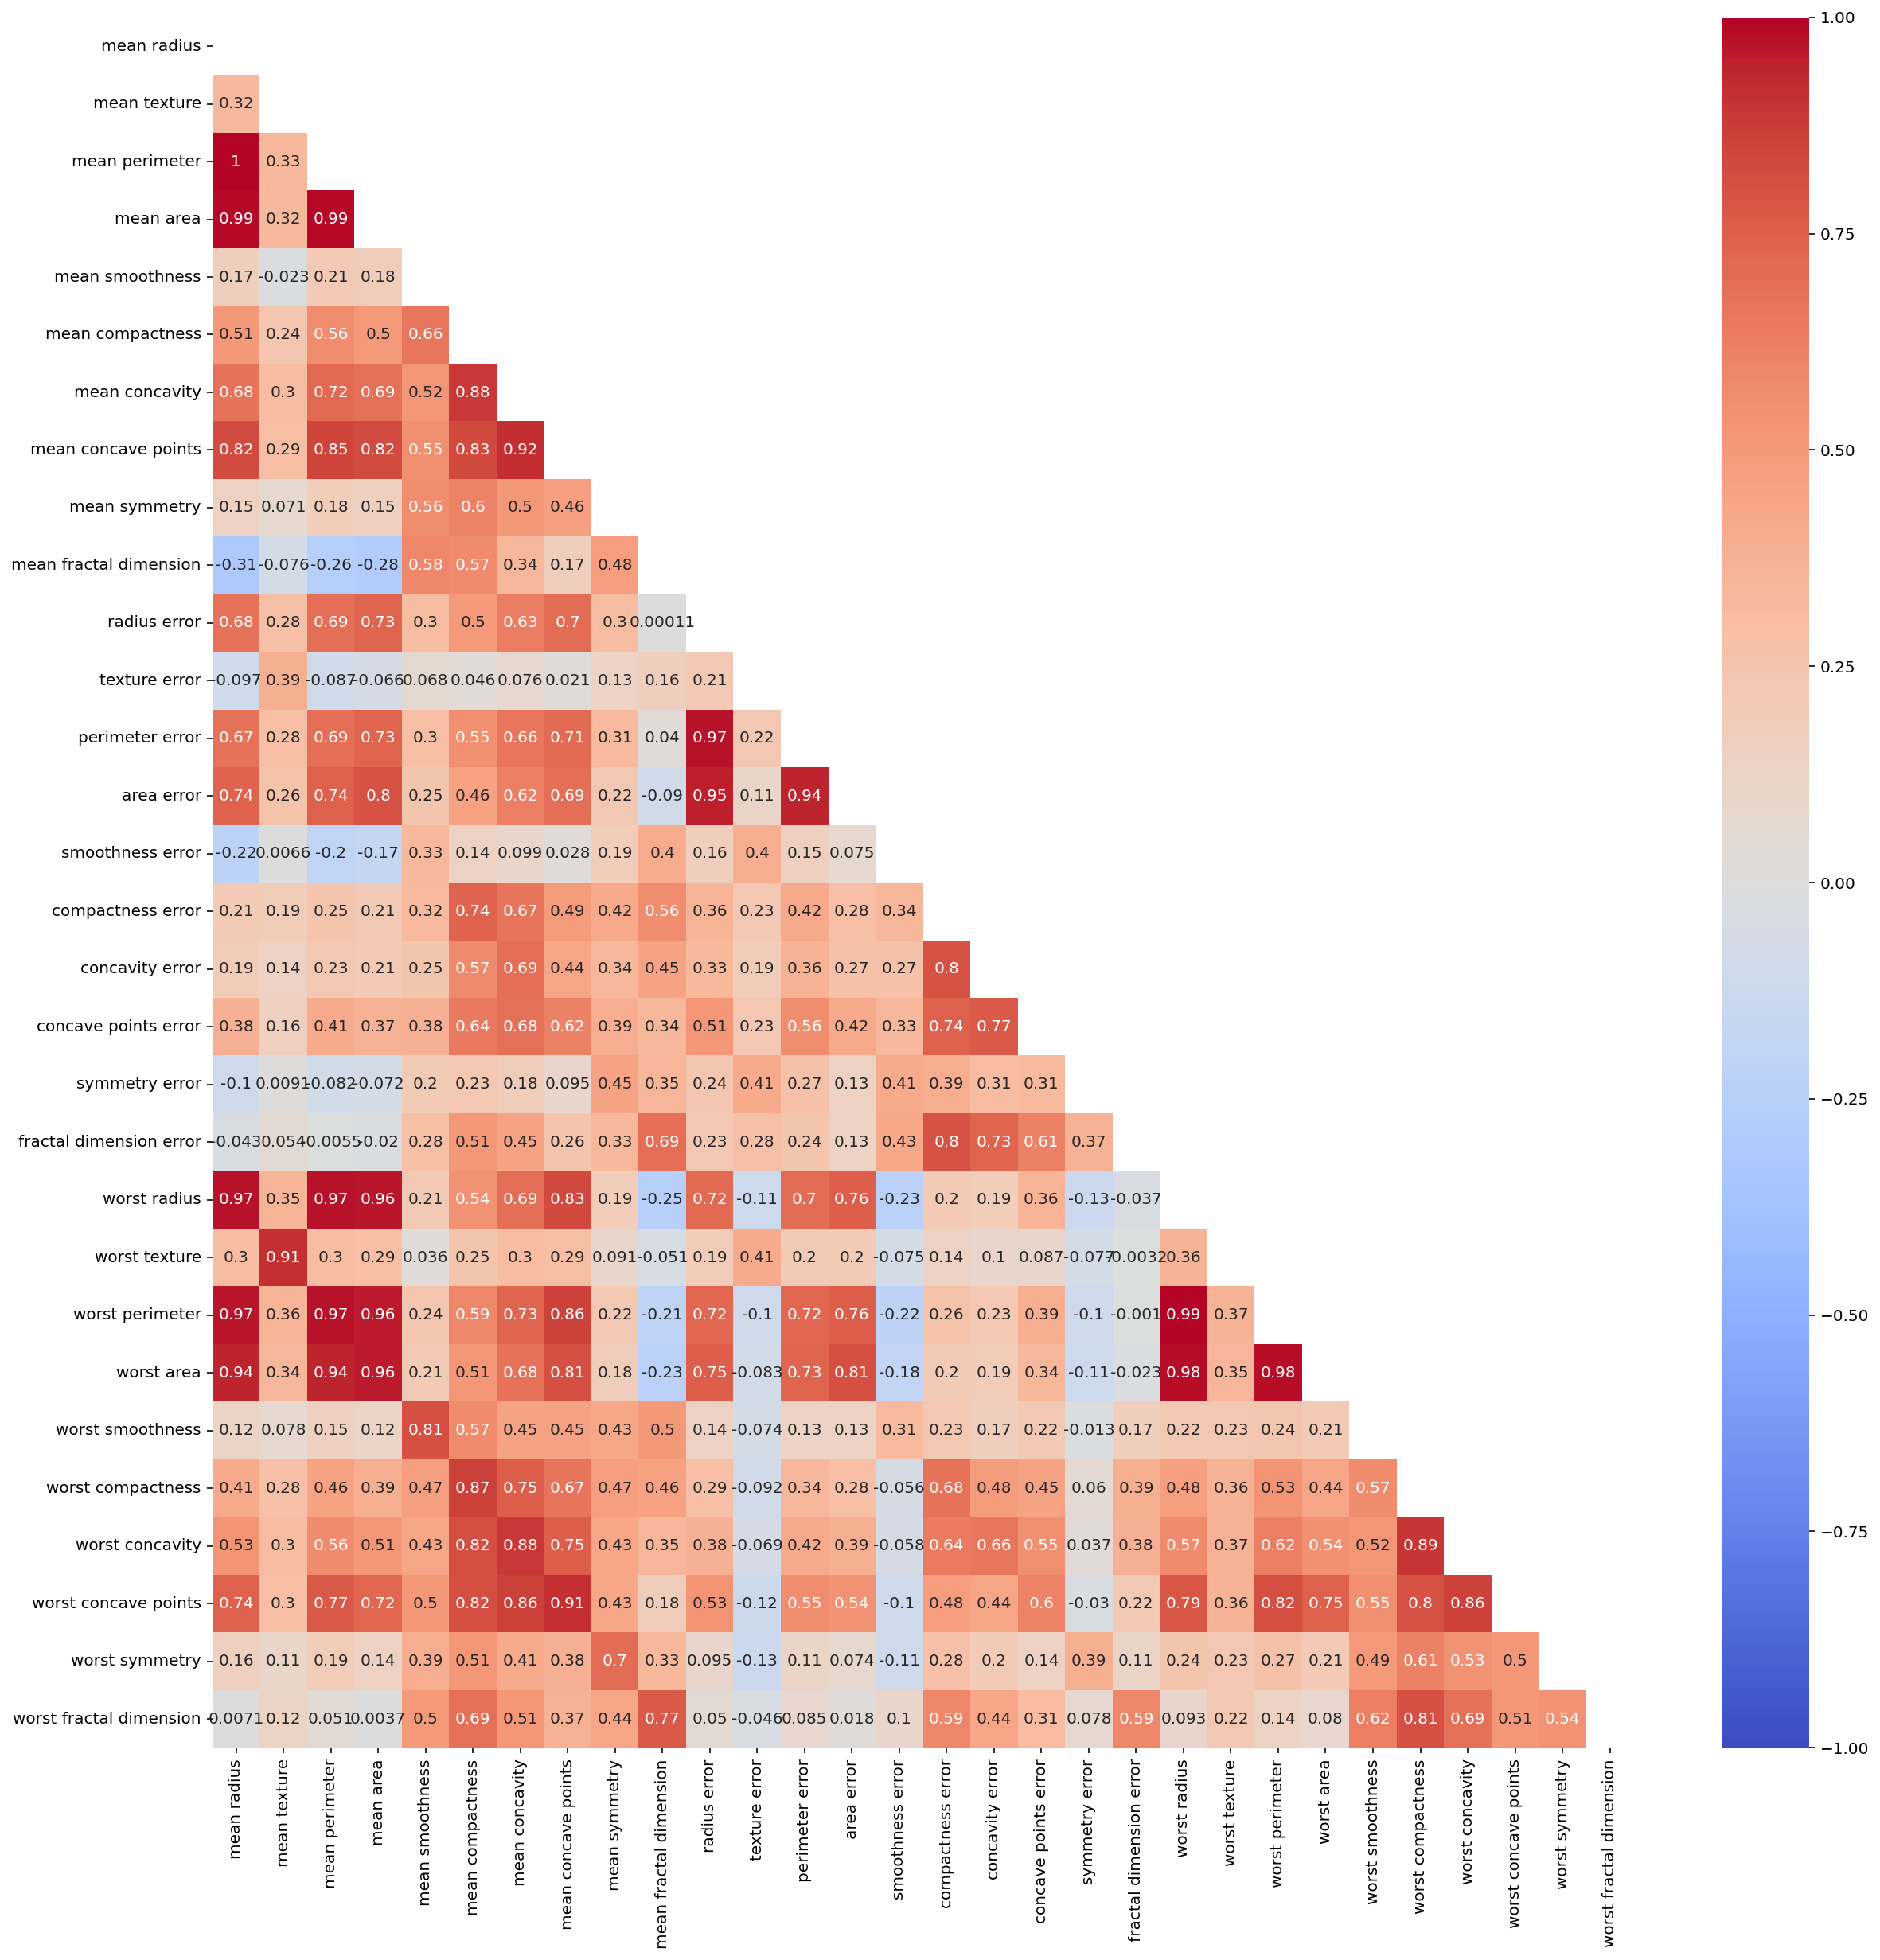

In [11]:
plt.figure(figsize=(20,20))
corr = breast_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1, mask = mask);

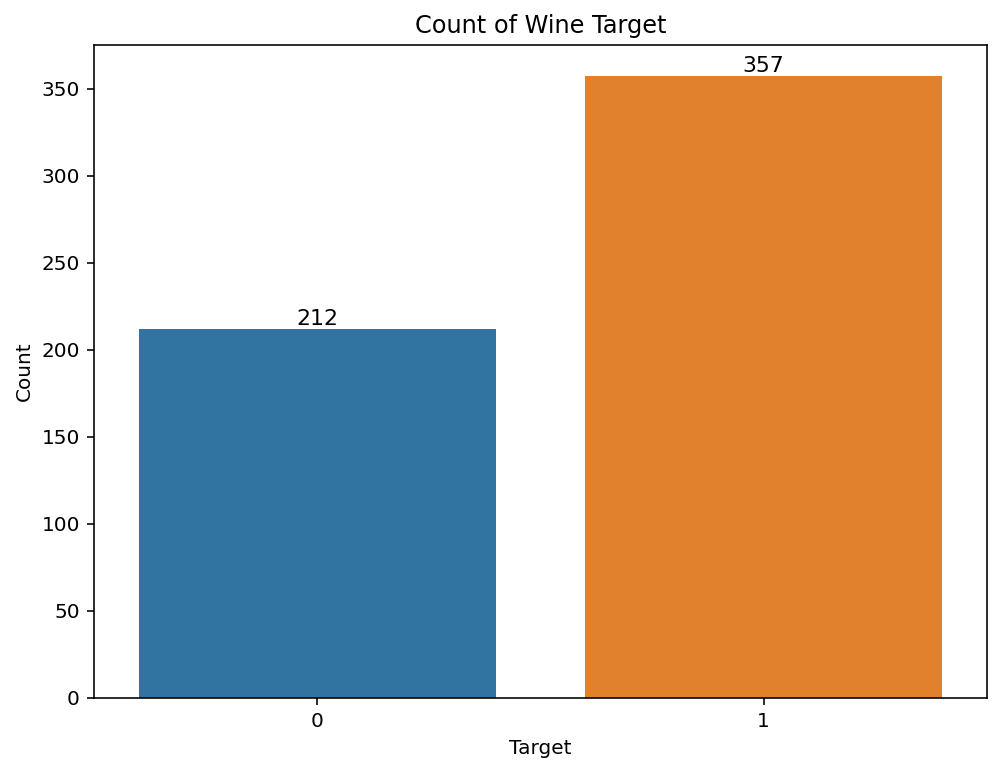

In [12]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=breast_target['label'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count of Wine Target')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

데이터 불균형을 확인

### train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(breast_df,
                                                   breast_target,
                                                    test_size=0.2,
                                                   random_state=205)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455, 1), (114, 1))

## Base line

### Decision Tree 

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(random_state=205)
decision_tree.fit(X_train,y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree 모델의 정확도:", round(accuracy_dt * 100, 2), "%")


Decision Tree 모델의 정확도: 90.35 %


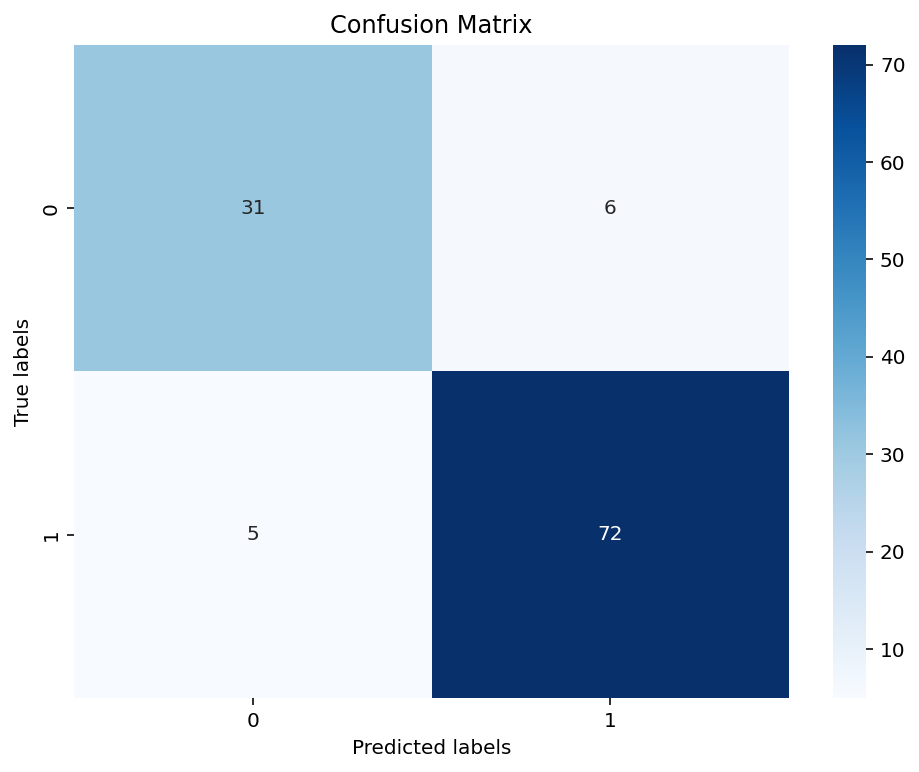

In [16]:
from sklearn.metrics import confusion_matrix


# 혼동 행렬을 생성합니다.
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# 혼동 행렬을 히트맵으로 시각화합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        37
           1       0.92      0.94      0.93        77

    accuracy                           0.90       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



### Random Forest 

In [18]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=205)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest 모델의 정확도:", round(accuracy_rf * 100, 2), "%")

Random Forest 모델의 정확도: 97.37 %


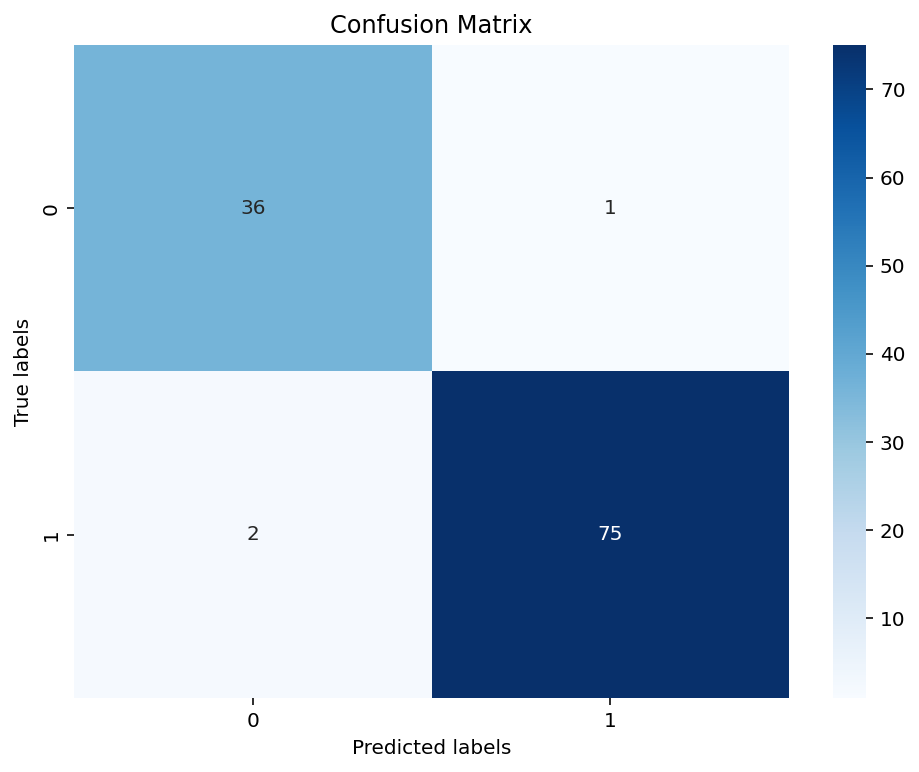

In [19]:
# 혼동 행렬을 생성합니다.
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# 혼동 행렬을 히트맵으로 시각화합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.99      0.97      0.98        77

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### SVM

In [21]:
from sklearn import svm
svm_model = svm.SVC(random_state=205)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM 모델의 정확도:", round(accuracy_svm * 100, 2), "%")

SVM 모델의 정확도: 94.74 %


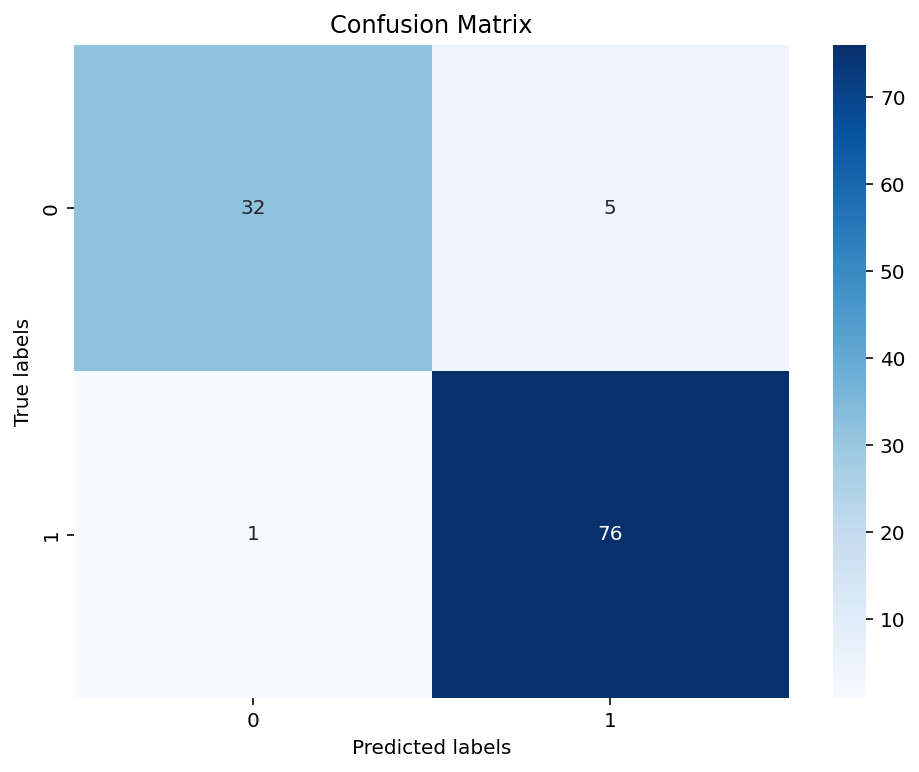

In [22]:
# 혼동 행렬을 생성합니다.
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# 혼동 행렬을 히트맵으로 시각화합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [23]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        37
           1       0.94      0.99      0.96        77

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### SGD Classifier

In [24]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state=205)

sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print("SGD 모델의 정확도:", round(accuracy_sgd * 100, 2), "%")

SGD 모델의 정확도: 90.35 %


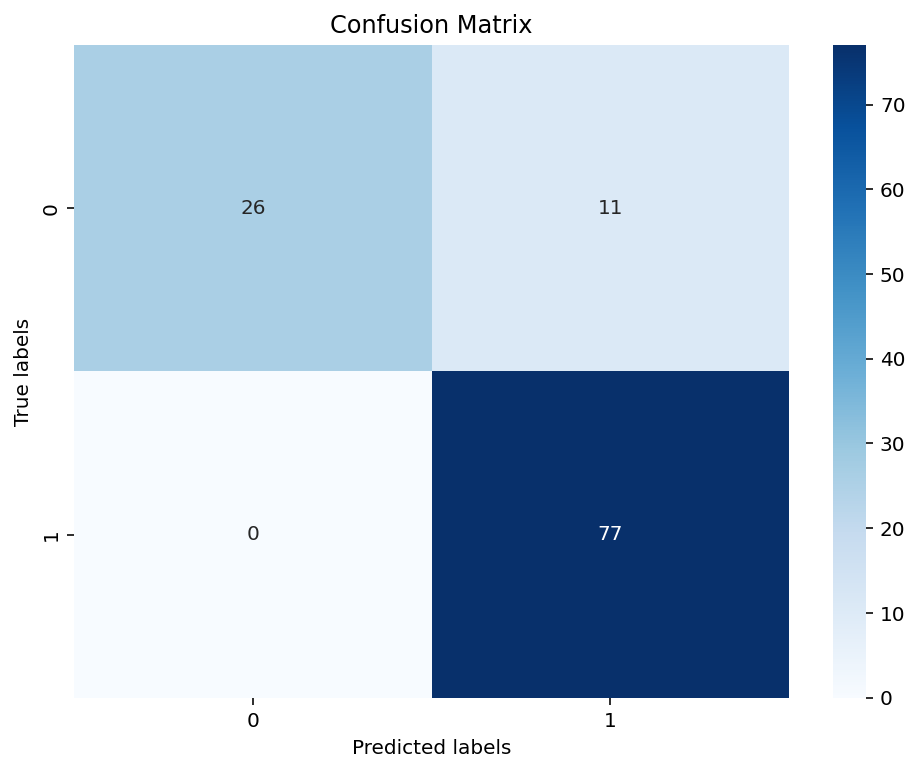

In [25]:
# 혼동 행렬을 생성합니다.
conf_matrix = confusion_matrix(y_test, y_pred_sgd)

# 혼동 행렬을 히트맵으로 시각화합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       1.00      0.70      0.83        37
           1       0.88      1.00      0.93        77

    accuracy                           0.90       114
   macro avg       0.94      0.85      0.88       114
weighted avg       0.92      0.90      0.90       114



### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=205)

logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("SGD 모델의 정확도:", round(accuracy_lr * 100, 2), "%")

SGD 모델의 정확도: 95.61 %


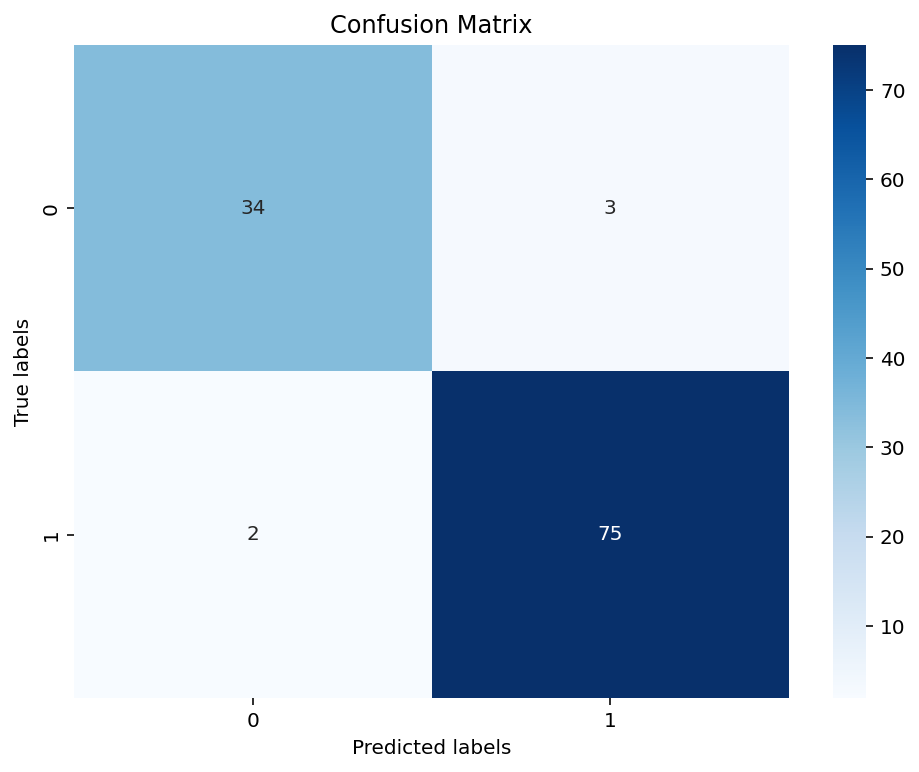

In [28]:
# 혼동 행렬을 생성합니다.
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# 혼동 행렬을 히트맵으로 시각화합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        37
           1       0.96      0.97      0.97        77

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



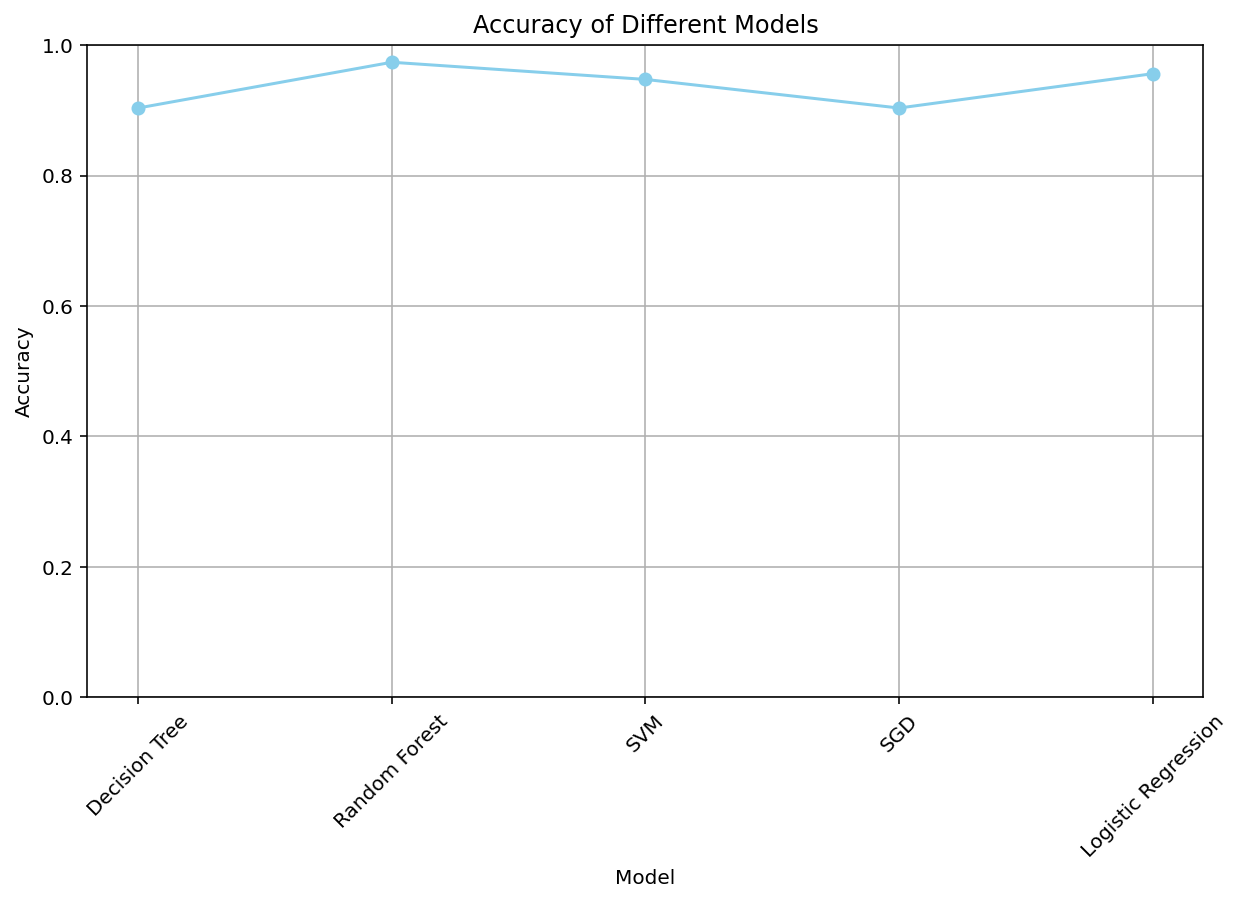

In [30]:
model_names = ['Decision Tree', 'Random Forest', 'SVM', 'SGD', 'Logistic Regression']
accuracies = [accuracy_dt, accuracy_rf, accuracy_svm, accuracy_sgd, accuracy_lr]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # y-axis 범위를 0에서 1로 설정하여 정확도를 표시
plt.xticks(rotation=45)  # x 축 레이블을 45도로 회전
plt.grid(True)  # 그리드 추가
plt.show()

## 모델 평가
유방암 진단 데이터를 확인하고 학습을 진행 했습니다.
유방암 진단 데이터에서 클래스간의 데이터가 불군형적입니다. 그리고 <br>
실제 환자를 한명이라도 놓치면 안됀다. 즉 양성을 음성으로 판단하면 안 되기 때문에 <br>
재현율을 고려해보는게 좋아보입니다.<br>
Radom Forest 모델에 재현율을 고려해보는게 좋아보입니다.

In [31]:
print("Random Forest 모델의 정확도:", round(accuracy_rf * 100, 2), "%")

Random Forest 모델의 정확도: 97.37 %


In [32]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.99      0.97      0.98        77

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

